In [1259]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [1260]:
import skimage 
from skimage import io, filters

In [1261]:
import glob
archivos = glob.glob("/Users/alejandro/Desktop/Todas_Las_Fotos/*.tif")
print (archivos[0:5])

['/Users/alejandro/Desktop/Todas_Las_Fotos/gota1_0_dia1LB.tif', '/Users/alejandro/Desktop/Todas_Las_Fotos/gota1_dia1m9.tif', '/Users/alejandro/Desktop/Todas_Las_Fotos/gota2_0_dia1LB.tif', '/Users/alejandro/Desktop/Todas_Las_Fotos/gota2_dia1m9.tif', '/Users/alejandro/Desktop/Todas_Las_Fotos/gota3_0_dia1LB.tif']


In [1262]:
filename = archivos[58]
arname = filename[41:]

print(filename)
print(arname)

/Users/alejandro/Desktop/Todas_Las_Fotos/rastrillo3_dia2m9.tif
rastrillo3_dia2m9.tif


(1944, 2592, 3)


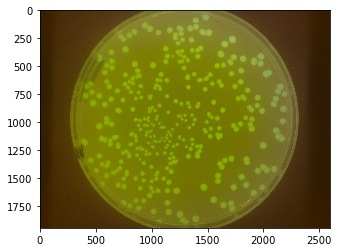

In [1263]:
imagefile = plt.imread(filename)
print(imagefile.shape)
plt.imshow(imagefile, aspect='equal')

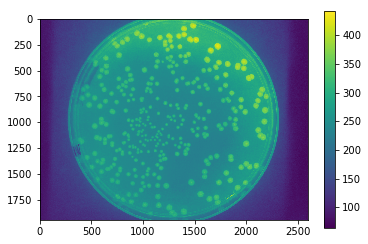

In [1264]:
image_sum = imagefile.sum(axis=2)
plt.imshow(image_sum)
plt.colorbar()

In [1265]:
from skimage.filters import gaussian
g_image = gaussian(imagefile[:, 400:2300, 1], 1)
ng_image = (g_image-g_image.min())/(g_image.max()-g_image.min())

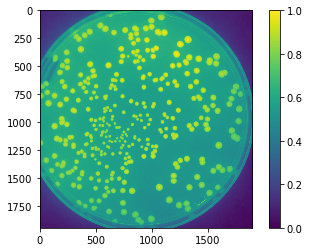

In [1266]:
plt.imshow(ng_image)
plt.colorbar()

In [1267]:
import skimage.feature as skfeat
A = skfeat.blob_log(ng_image, min_sigma=5.0, max_sigma=75.0, num_sigma=15, threshold=0.16, overlap=0.8)

In [1268]:
print(A.shape)
print(A[0:5, :])

(176, 3)
[[ 1862.   992.    20.]
 [ 1802.   748.    20.]
 [ 1740.  1237.    20.]
 [ 1719.   740.    20.]
 [ 1693.  1152.    20.]]


In [1269]:
A[0:5]

array([[ 1862.,   992.,    20.],
       [ 1802.,   748.,    20.],
       [ 1740.,  1237.,    20.],
       [ 1719.,   740.,    20.],
       [ 1693.,  1152.,    20.]])

/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


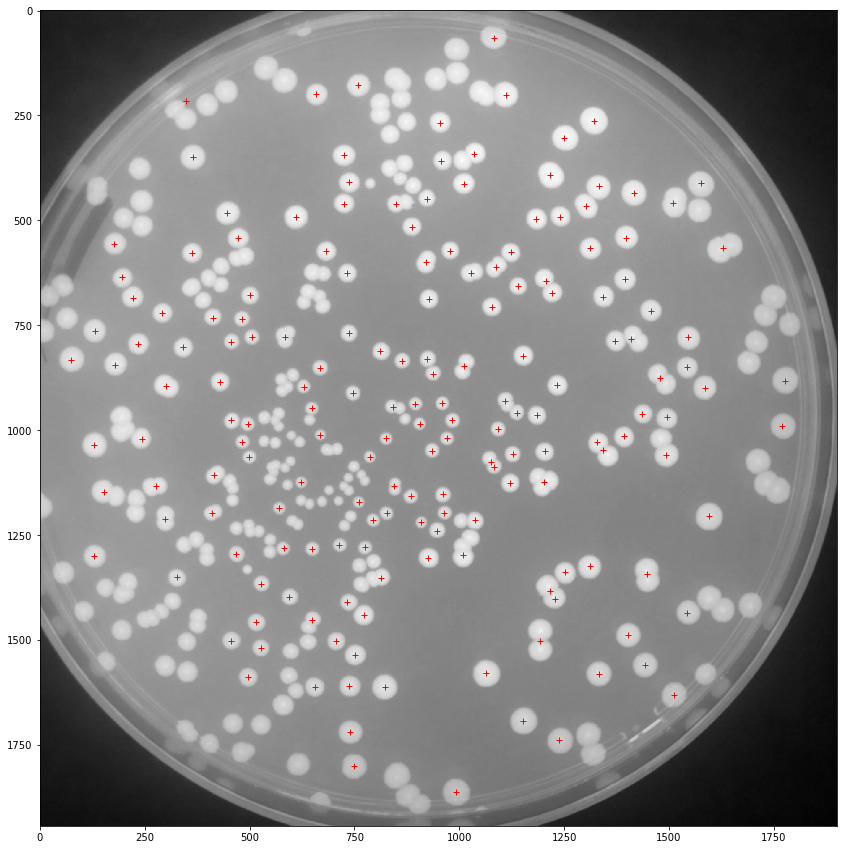

In [1270]:
plt.figure(figsize=(15, 15))
plt.imshow(ng_image, cmap='gray')
plt.hold(True)
for i in range(len(A)):
    plt.plot(A[i, 1], A[i, 0], 'r+')

/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


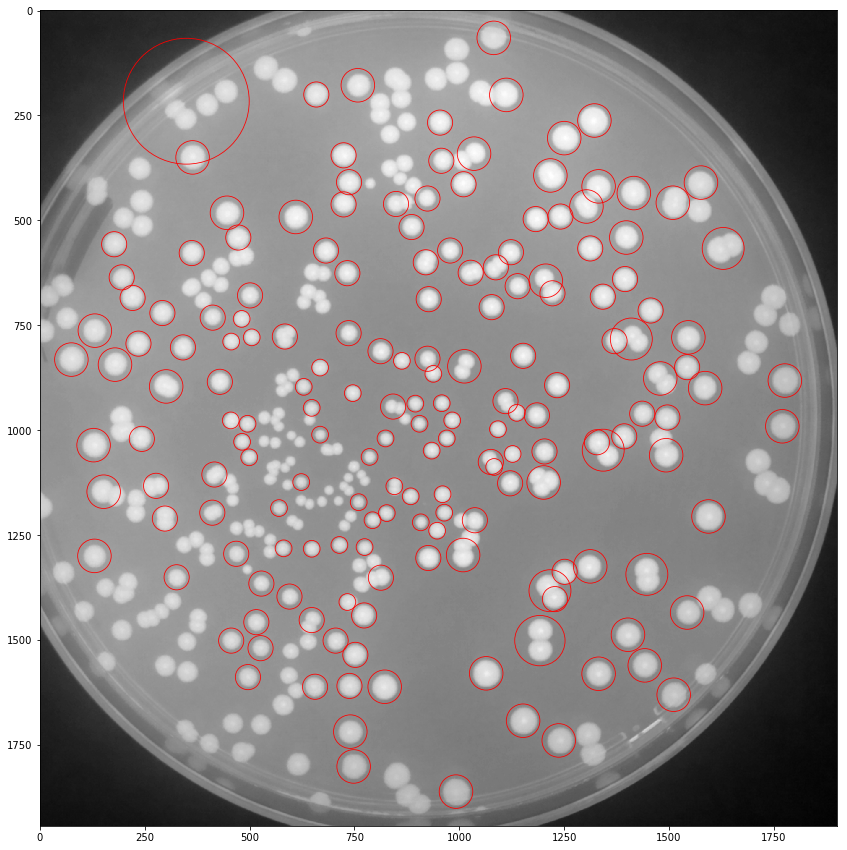

In [1271]:
plt.figure(figsize=(15, 15))
plt.imshow(ng_image, cmap='gray')
plt.hold(True)
for i in range(len(A)):
    circle = plt.Circle((A[i, 1], A[i, 0]), 2*A[i, 2], color='r', fill=False, lw=0.8)
    fig = plt.gcf()
    ax = fig.gca()
    ax.add_artist(circle)

In [1272]:
# A is the number of colonies detected in the image

from scipy.spatial import distance

nA = len(A)
print(len(A))
R = np.arange(0, 2000, 100)
print(R)
nR = len(R)
print(len(R))
count = np.zeros((nA, nR))

for c1 in range(nA):
    j = A[c1, 0:2]
    xj = j[0]
    yj = j[1]
    sj = A[c1, 2]

    for c2 in range(nA):
        l = A[c2, 0:2]
        xl = l[0]
        yl = l[1] 
        sl = A[c2, 2]
       
        d = distance.euclidean(j, l)
        
        with open('Datos_Imagen_%s.txt' %arname, 'a') as f:
        
            print("Colony 1X : %f, Colony 1Y : %f, Colony 2X : %f, Colony 2Y : %f, Distance : %f" % (xj, yj, xl, yl, d), file=f)
               
        for r in range(nR):
            if d < R[r]:
                count[c1, r] += 1
                
print(count[:, :])

np.savetxt('Count_Imagen_%s.csv' %arname, count, fmt='%i', delimiter=",")

176
[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900]
20


[[   0.    1.    1. ...,  173.  176.  176.]
 [   0.    2.    3. ...,  175.  176.  176.]
 [   0.    2.    3. ...,  175.  176.  176.]
 ..., 
 [   0.    1.    3. ...,  176.  176.  176.]
 [   0.    1.    3. ...,  175.  176.  176.]
 [   0.    1.    2. ...,  174.  176.  176.]]


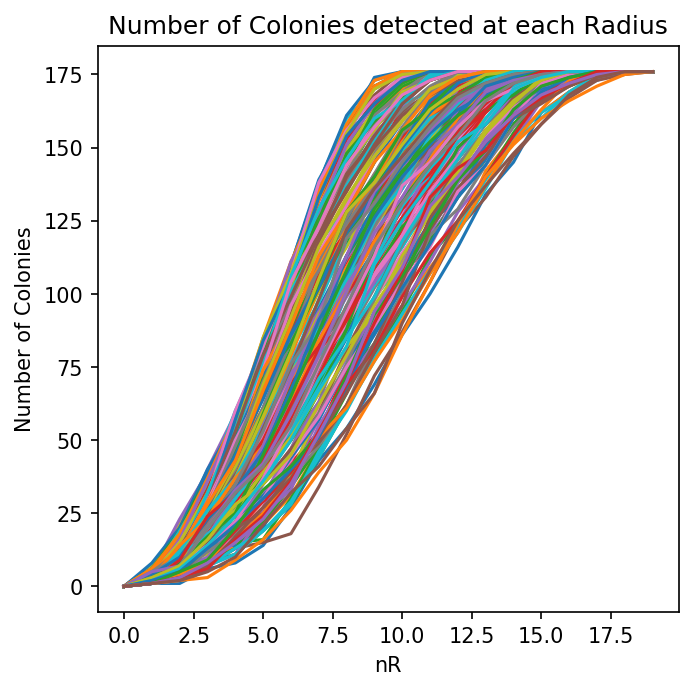

In [1273]:
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(count.transpose())
plt.xlabel('nR')
plt.ylabel('Number of Colonies')
plt.title('Number of Colonies detected at each Radius')
plt.savefig('Gráfico_1_%s.png' %arname)
plt.show()

In [1274]:
# This is C(r)
C = np.mean(count, 0)
print(C)
np.savetxt('Cr_Imagen_%s.csv' %arname, C, fmt='%f', delimiter=",")

[   0.            3.25         10.32954545   22.23863636   36.56818182
   53.64772727   72.31818182   91.48863636  109.72727273  125.79545455
  139.63636364  151.11363636  159.97727273  166.59090909  171.34090909
  174.04545455  175.31818182  175.86363636  175.98863636  176.        ]


/Users/alejandro/anaconda/envs/Raspiscope/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


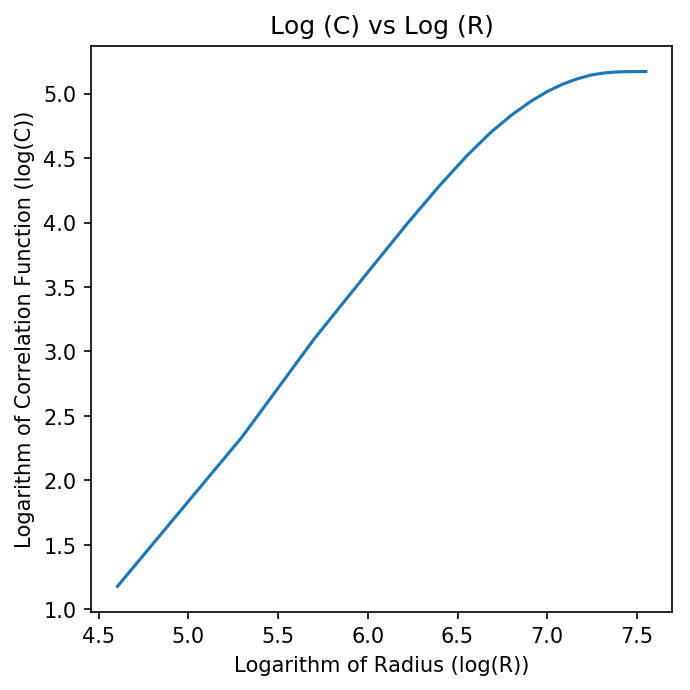

In [1275]:
fig2 = plt.figure()
plt.plot(np.log(R), np.log(C))
plt.xlabel('Logarithm of Radius (log(R))')
plt.ylabel('Logarithm of Correlation Function (log(C))')
plt.title('Log (C) vs Log (R)')
plt.savefig('Gráfico_2_%s.png' %arname)
plt.show()

In [1276]:
from scipy.stats import linregress
pendiente = linregress(np.log(R[1:N]), np.log(C[1:N]))
with open('Pendiente_Imagen_%s.txt' %arname, 'a') as g:
    print(pendiente, file=g)